### Final size for SIR model

In [1]:
%%file SIR_fs_m.m
function final_size=SIR_fs_m(N,bet,gamm)
    final_size = zeros(N+1,1);
    final_size(2) = 1;
    for Z2 = 0:N;
        for Z1 = Z2+1:N-1
            p1 = 1 / ( 1 + gamm/(bet*(N-Z1)));
            final_size(Z1+2) = final_size(Z1+2) + final_size(Z1+1)*p1;       
            final_size(Z1+1) = final_size(Z1+1)*(1-p1);
        end
    end
end

Created file '/home/simon/Projects/epistruct/Black-Ross-2015/SIR_fs_m.m'.


In [2]:
N = 100;                       
bet = 2/(N-1);
gamm = 1;

In [3]:
id = tic();
q=SIR_fs_m(N,bet,gamm);
toc(id)

Elapsed time is 0.007254 seconds.


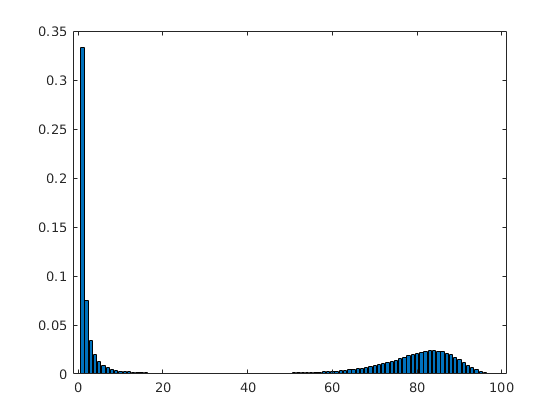

In [4]:
bar(0:N,q)

## Final size for SI(4)R model

In [5]:
%%file SI4R_fs_m.m
function final_size=SI4R_fs_m(N,bet,gamm)
    Psi = (N+1)*(N+2)*(N+3)*(N+4)/24;
    final_size = zeros(N+1,1);
    p_vec = zeros(Psi,1);
    p_vec(2)=1;

    for Z5 = 0:N
        w = Psi - (N-Z5+1)*(N-Z5+2)*(N-Z5+3)*(N-Z5+4)/24 + 1; 
        for Z4 = Z5:N
            a5 = 4*gamm*(Z4-Z5);
            for Z3 = Z4:N
                a4 = 4*gamm*(Z3-Z4);
                for Z2 = Z3:N;
                    a3 = 4*gamm*(Z2-Z3);            
                    for Z1 = Z2:N
                        a1 = bet*(N-Z1)*(Z1-Z5);   
                        a2 = 4*gamm*(Z1-Z2);
                        tot = a1+a2+a3+a4+a5;
                        if Z1-Z5 == 0
                            final_size(Z5+1) = p_vec(w);
                        end
                        if a1 > 0
                           p_vec(w+1) = p_vec(w+1)+ p_vec(w)*a1/tot;
                        end
                        if a2 > 0
                            p_vec(w+N-Z2) = p_vec(w+N-Z2)+ p_vec(w)*a2/tot;
                        end
                        if a3 > 0
                            place3 = (N-Z3)*(N-Z3+1)/2;
                            p_vec(w+place3) = p_vec(w+place3)+ p_vec(w)*a3/tot;
                        end
                        if a4 > 0
                            place4 = (N-Z4)*(N-Z4+1)*(N-Z4+2)/6; 
                            p_vec(w+place4) = p_vec(w+place4) + p_vec(w)*a4/tot;
                        end
                        if a5 > 0
                            p_vec(w) = p_vec(w)*a5/tot;
                        end
                        w = w + 1;
                    end
                end
            end
        end
    end
end

Created file '/home/simon/Projects/epistruct/Black-Ross-2015/SI4R_fs_m.m'.


In [6]:
id = tic();
q=SI4R_fs_m(N,bet,gamm);
toc(id)

Elapsed time is 2.651793 seconds.
